In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/calonpembelimobil.csv')

In [3]:
df.sample(5)

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
695,696,25,1,0,2,356,1
690,691,41,3,1,1,269,1
373,374,48,2,1,0,173,0
683,684,58,0,0,1,387,1
352,353,60,1,0,0,274,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [5]:
df.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


In [6]:
df.Usia.unique()

array([ 32,  49,  52,  26,  45,  39,  38,  29,  30,  51,  28,  25,  34,
        27,  42,  33,  53,  50,  40,  44,  35,  41,  48,  37,  31,  47,
        24,  59,  64,  61,  54,  36,  46,  43,  55,  62,  60, 164, 131,
        56,  65,  58,  57,  63])

In [7]:
df[df.Usia == 164]

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
200,201,164,0,0,0,100,0


In [8]:
df[df.Usia == 131]

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
227,228,131,2,1,0,100,0


#### Dua datum ini kemungkinana kesalahn perhitungan, karena menurut intuisi tidak ada orang yang berumur 164 dan 131 saat ini, kalaupun ada kemungkinan mereka sudah tidak punya penghasilan (karena sudah tidak bisa bekerja). kenapa ini dihapus karena kemungkinan bisa mengacaukan regresi

In [9]:
# feature selecting (coba menggunakan semua feature terlebih dahulu)

X = df[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df['Beli_Mobil']

In [10]:
# membagi data untuk training dan testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(800, 5)

In [12]:
# membuat model regression dengan logistic regression
from sklearn.linear_model import LogisticRegression

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
y_pred = model.predict(X_test)

### **Model Evaluation**

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 55,   9],
       [  5, 131]])

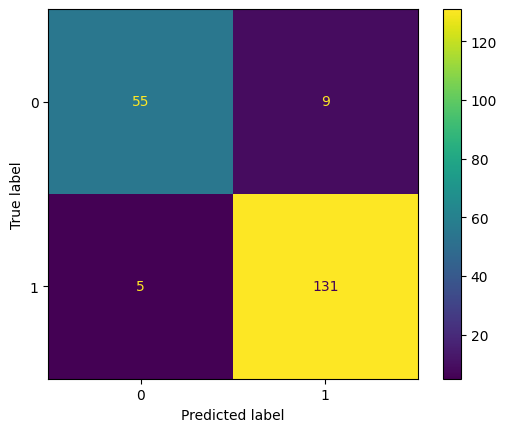

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

#### dari hasil confusion matrix, model sudah cukup bagus untuk memprediksi apakah seseorang akan membeli(1) atau tidak membeli mobil (0)

##### ada 5 pada data testing dimana orang yang membeli mobil tapi diprediksi tidak membeli mobil oleh model, dan juga orang yang tidak membeli mobil sebanyak 9 namun diprediksi membeli mobil oleh model

In [36]:
df.Beli_Mobil[df['Beli_Mobil']==0].count()

np.int64(367)

In [37]:
df.Beli_Mobil[df['Beli_Mobil']==1].count()

np.int64(633)

In [40]:
from sklearn.metrics import roc_auc_score

In [41]:
roc_auc_score(y_test, y_pred)

0.9113051470588236

In [43]:
# visualisasi ROC Curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

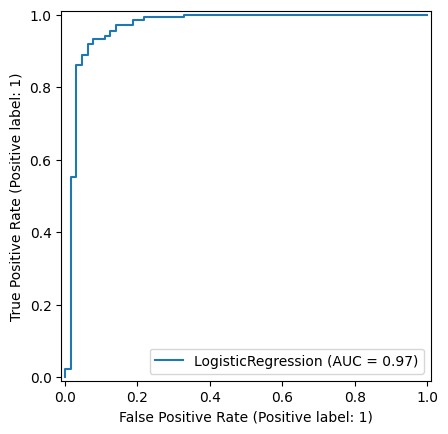

In [45]:
roc_curve_display = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

#### Nilai AUC pada Roc Curve juga mencapi 0.97 yang menunjukkan model telah memprediksi data dengan baik